### Importing the library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mat
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Lea

In [2]:
df = pd.read_csv("50_Startups.csv")

In [3]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [4]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


<AxesSubplot:>

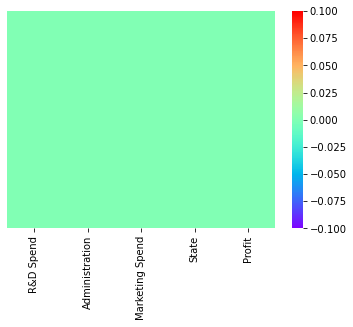

In [6]:
sns.heatmap(df.isnull(),yticklabels=False, cmap="rainbow")

### One hot encoding

In [7]:
X = df.iloc[:, :4]
Y = df.iloc[:,4:5]

In [8]:
encoding_state = pd.get_dummies(X["State"])
encoding_state

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
5,0,0,1
6,1,0,0
7,0,1,0
8,0,0,1
9,1,0,0


In [9]:
encoding_state.columns  = ["California","Florida","New York"]

In [10]:
X.drop('State', axis=1, inplace=True)

In [11]:
X.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [12]:
df = pd.concat([X, encoding_state], axis = 1)
df

,R&D Spend,Administration,Marketing Spend,California,Florida,New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0
5,131876.90,99814.71,362861.36,0,0,1
6,134615.46,147198.87,127716.82,1,0,0
7,130298.13,145530.06,323876.68,0,1,0
8,120542.52,148718.95,311613.29,0,0,1
9,123334.88,108679.17,304981.62,1,0,0


### Spliting the data

In [48]:
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [49]:
reg = LinearRegression()

### Fitting the data

In [50]:
reg.fit(X_train, Y_train)


LinearRegression()

In [51]:
y_pred = reg.predict(x_test)

In [52]:
score = r2_score(y_test, y_pred)
score

0.981491312159712